In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
apple1=pd.read_csv("AAPL Historical Data.csv")

In [14]:
apple2=pd.read_csv("AAPL Historical Data (1).csv")

In [41]:
apple=pd.concat([apple2,apple1 ]).reset_index(drop=True)

In [42]:
apple

,Date,Price,Open,High,Low,Vol.,Change %
0,07/21/2023,191.94,194.10,194.97,191.23,71.95M,-0.62%
1,07/20/2023,193.13,195.09,196.47,192.49,59.58M,-1.01%
2,07/19/2023,195.10,193.10,198.23,192.65,80.51M,0.71%
3,07/18/2023,193.73,193.35,194.33,192.41,48.20M,-0.13%
4,07/17/2023,193.99,191.90,194.32,191.81,49.84M,1.73%
...,...,...,...,...,...,...,...
8436,01/26/1990,0.29,0.30,0.30,0.29,181.25M,-3.33%
8437,01/25/1990,0.30,0.31,0.31,0.30,111.54M,0.00%
8438,01/24/1990,0.30,0.29,0.31,0.29,169.79M,0.00%
8439,01/23/1990,0.30,0.30,0.31,0.29,140.87M,0.00%


In [58]:
apple.isnull().sum()

Date               0
Price              0
Open               0
High               0
Low                0
Vol.               0
Change %           0
yesterday_price    0
dtype: int64

In [57]:
apple.dropna(inplace=True)

In [10]:
apple=apple.iloc[::-1]

In [52]:
apple['yesterday_price'] = apple['Price'].shift(-1)

In [53]:
apple

,Date,Price,Open,High,Low,Vol.,Change %,yesterday_price
0,07/21/2023,191.94,194.10,194.97,191.23,71.95M,-0.62%,193.13
1,07/20/2023,193.13,195.09,196.47,192.49,59.58M,-1.01%,195.10
2,07/19/2023,195.10,193.10,198.23,192.65,80.51M,0.71%,193.73
3,07/18/2023,193.73,193.35,194.33,192.41,48.20M,-0.13%,193.99
4,07/17/2023,193.99,191.90,194.32,191.81,49.84M,1.73%,190.69
...,...,...,...,...,...,...,...,...
8436,01/26/1990,0.29,0.30,0.30,0.29,181.25M,-3.33%,0.30
8437,01/25/1990,0.30,0.31,0.31,0.30,111.54M,0.00%,0.30
8438,01/24/1990,0.30,0.29,0.31,0.29,169.79M,0.00%,0.30
8439,01/23/1990,0.30,0.30,0.31,0.29,140.87M,0.00%,0.30


In [67]:
def split_date(date):
    day=date.split("/")[1]
    month=date.split("/")[0]
    year=date.split("/")[2]
    return day,month,year

In [66]:
d="20/5/2007"
d.split("/")[2]

'2007'

In [72]:
apple[['day','month','year']]=apple['Date'].apply(split_date).tolist()

In [76]:
apple.drop(['Date','High','Low'],axis='columns',inplace=True)

In [77]:
apple

,Price,Open,Vol.,Change %,yesterday_price,day,month,year
0,191.94,194.10,71.95M,-0.62%,193.13,21,07,2023
1,193.13,195.09,59.58M,-1.01%,195.10,20,07,2023
2,195.10,193.10,80.51M,0.71%,193.73,19,07,2023
3,193.73,193.35,48.20M,-0.13%,193.99,18,07,2023
4,193.99,191.90,49.84M,1.73%,190.69,17,07,2023
...,...,...,...,...,...,...,...,...
8435,0.30,0.29,119.93M,3.45%,0.29,29,01,1990
8436,0.29,0.30,181.25M,-3.33%,0.30,26,01,1990
8437,0.30,0.31,111.54M,0.00%,0.30,25,01,1990
8438,0.30,0.29,169.79M,0.00%,0.30,24,01,1990


In [84]:
d="22M"
s=int(d.split('M')[0])*

'22000'

In [90]:
def vol_remake (vol):
    chars=['M','B','K']
    for c in chars:
        if c in vol:
            if c == "M":
                vol=float(vol.split(c)[0])*1000000
            if c == "B":
                vol=float(vol.split(c)[0])*1000000000
            if c == "K":
                vol=float(vol.split(c)[0])*1000
            return vol

In [91]:
apple['volume']=apple['Vol.'].apply(vol_remake)

In [95]:
apple.drop(['Vol.'],axis='columns',inplace=True)

In [99]:
apple['change']=apple['Change %'].apply(lambda x:x.split("%")[0])

In [102]:
apple.drop(['Change %'],axis='columns',inplace=True)

In [105]:
apple=apple.astype(float)

In [106]:
apple

,Price,Open,yesterday_price,day,month,year,volume,change
0,191.94,194.10,193.13,21.0,7.0,2023.0,71950000.0,-0.62
1,193.13,195.09,195.10,20.0,7.0,2023.0,59580000.0,-1.01
2,195.10,193.10,193.73,19.0,7.0,2023.0,80510000.0,0.71
3,193.73,193.35,193.99,18.0,7.0,2023.0,48200000.0,-0.13
4,193.99,191.90,190.69,17.0,7.0,2023.0,49840000.0,1.73
...,...,...,...,...,...,...,...,...
8435,0.30,0.29,0.29,29.0,1.0,1990.0,119930000.0,3.45
8436,0.29,0.30,0.30,26.0,1.0,1990.0,181250000.0,-3.33
8437,0.30,0.31,0.30,25.0,1.0,1990.0,111540000.0,0.00
8438,0.30,0.29,0.30,24.0,1.0,1990.0,169790000.0,0.00


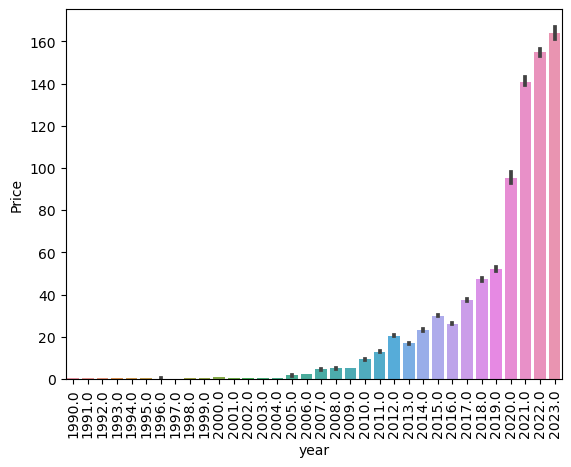

In [115]:
sns.barplot(x=apple['year'],y=apple['Price'])
plt.xticks(rotation=90)
plt.show()

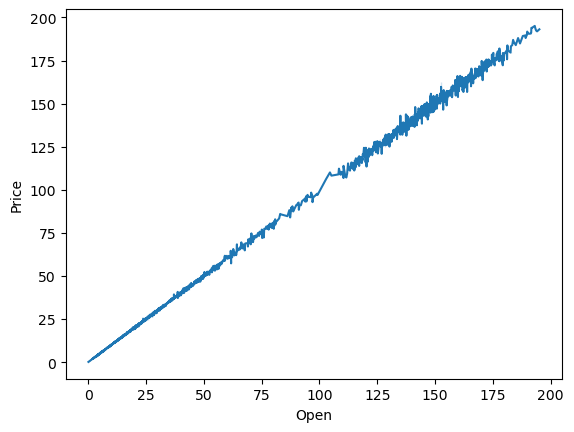

In [118]:
sns.lineplot(x='Open',y='Price',data=apple)
plt.show()

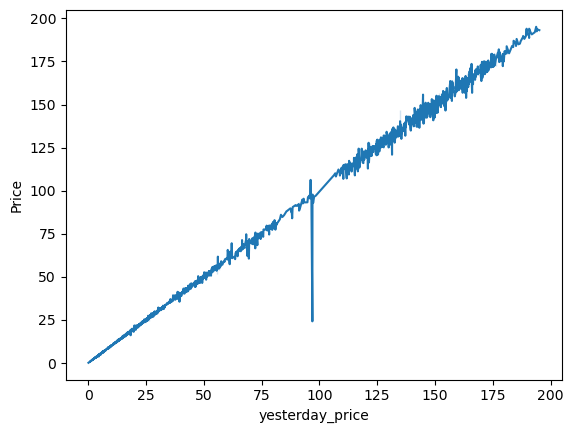

In [119]:
sns.lineplot(x='yesterday_price',y='Price',data=apple)
plt.show()

sns.lineplot(x='volume',y='Price',data=apple)
plt.show()

In [138]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from tqdm import tqdm

In [132]:
X=apple.drop(['Price'],axis='columns')
y=apple['Price']

In [134]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [135]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=24)

In [140]:
model_params={
    'linear':{
        'model':LinearRegression(),
        'params':{}
    },
    'lasso':{
        'model':Lasso(),
        'params':{
            'selection':['cyclic', 'random']
        }
    },
    "ridge":{
        'model':Ridge(),
        'params':{
            'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
        }
    },
}

In [141]:
scores=[]
for model_name, mp in tqdm(model_params.items()):
    clf=GridSearchCV(mp['model'],mp['params'],cv=10,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])

  0%|          | 0/3 [00:00<?, ?it/s]C:\Users\Lenovo Ideapad L340\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.371e+03, tolerance: 9.977e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo Ideapad L340\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+03, tolerance: 1.031e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo Ideapad L340\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, 

In [142]:
df

,model,best_score,best_params
0,linear,0.999701,{}
1,lasso,0.999117,{'selection': 'cyclic'}
2,ridge,0.999687,{'solver': 'lsqr'}


In [143]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [144]:
from sklearn.metrics import r2_score,mean_absolute_error


In [146]:
y_pred = model.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9997375820373523
MAE 0.30991786467630894


AttributeError: 'LinearRegression' object has no attribute 'evaluate'